# Introduction
Exploring a DICOM dataset

Adapted from the Kaggle Kernel:
Getting to know DICOM and the Data  by schlerp

https://www.kaggle.com/schlerp/getting-to-know-dicom-and-the-data/notebook

A Multi-platform DICOM Toolbox for Academic Radiologists by 

http://uwmsk.org/jupyter/Jupyter_DICOM_toolbox.html

A Radiologist’s Exploration of the Stanford ML Group’s MRNet data
by Walter Wiggins

https://towardsdatascience.com/a-radiologists-exploration-of-the-stanford-ml-group-s-mrnet-data-8e2374e11bfb

### Imports
Import libraries and write settings here.

In [1]:
# File handling
import os
import glob

# Data manipulation
import pandas as pd

import numpy as np

# Data visualization
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimage

import seaborn as sns
from tqdm import tqdm

# Date manipulation
import datetime

# DICOM format reader
import pydicom


In [2]:
def show_dcm_info(ds):
    print()
    print("Filename.........: ", file_path)
    print("Storage type.....: ", ds.SOPClassUID)
    print()
    
    pat_name = ds.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient name.....: ", display_name)
    print("Patient ID.......: ", ds.PatientID)
    print("Patient Age......: ", ds.PatientAge)
    print("Patient Sex......: ", ds.PatientSex)
    print("Modality.........: ", ds.Modality)
    print("Body Part........: ", ds.BodyPartExamined)
    print("View Position....: ", ds.ViewPosition)
    
    
    if 'PixelData' in ds:
        rows = int(ds.Rows)
        cols = int(ds.Columns)
        print("Image size.......:  {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(ds.PixelData)))
        if 'PixelSpacing' in ds:
            print("Pixel spacing....: ", ds.PixelSpacing)

In [3]:
def plot_pixel_array(ds, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()


Filename.........:  ../dicom/train_images/1.2.276.0.7230010.3.1.4.8323329.300.1517875162.258081.dcm
Storage type.....:  1.2.840.10008.5.1.4.1.1.7

Patient name.....:  88c14312-3265-4a3f-b7bb-41818107d607, 
Patient ID.......:  88c14312-3265-4a3f-b7bb-41818107d607
Patient Age......:  58
Patient Sex......:  F
Modality.........:  CR
Body Part........:  CHEST
View Position....:  AP
Image size.......:  1024 x 1024, 154050 bytes
Pixel spacing....:  [0.139, 0.139]


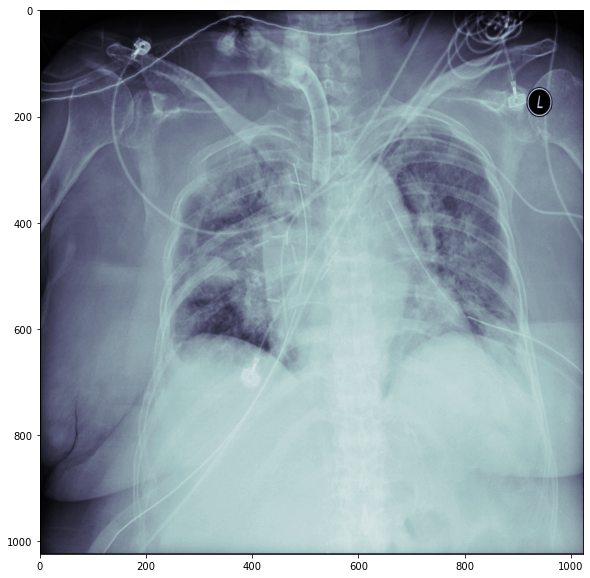


Filename.........:  ../dicom/train_images/1.2.276.0.7230010.3.1.4.8323329.304.1517875162.301989.dcm
Storage type.....:  1.2.840.10008.5.1.4.1.1.7

Patient name.....:  fa43083b-0d94-4849-a5c4-40120c380164, 
Patient ID.......:  fa43083b-0d94-4849-a5c4-40120c380164
Patient Age......:  60
Patient Sex......:  M
Modality.........:  CR
Body Part........:  CHEST
View Position....:  PA
Image size.......:  1024 x 1024, 150238 bytes
Pixel spacing....:  [0.14300000000000002, 0.14300000000000002]


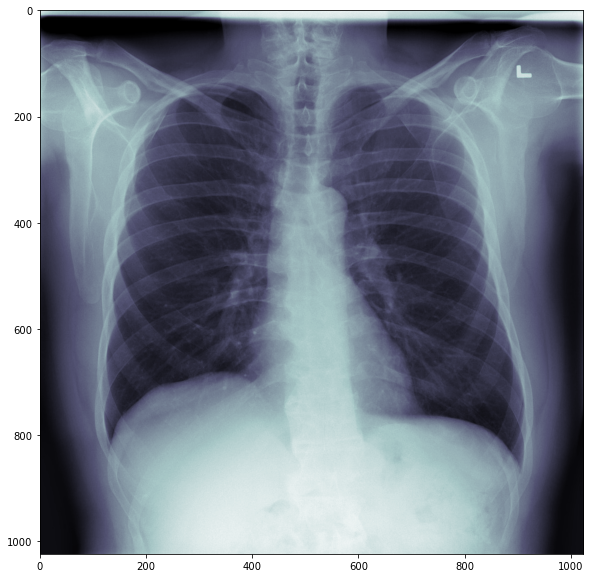


Filename.........:  ../dicom/train_images/1.2.276.0.7230010.3.1.4.8323329.301.1517875162.280319.dcm
Storage type.....:  1.2.840.10008.5.1.4.1.1.7

Patient name.....:  97d32841-8836-4630-873c-be0b4d2e5478, 
Patient ID.......:  97d32841-8836-4630-873c-be0b4d2e5478
Patient Age......:  50
Patient Sex......:  F
Modality.........:  CR
Body Part........:  CHEST
View Position....:  PA
Image size.......:  1024 x 1024, 159756 bytes
Pixel spacing....:  [0.14300000000000002, 0.14300000000000002]


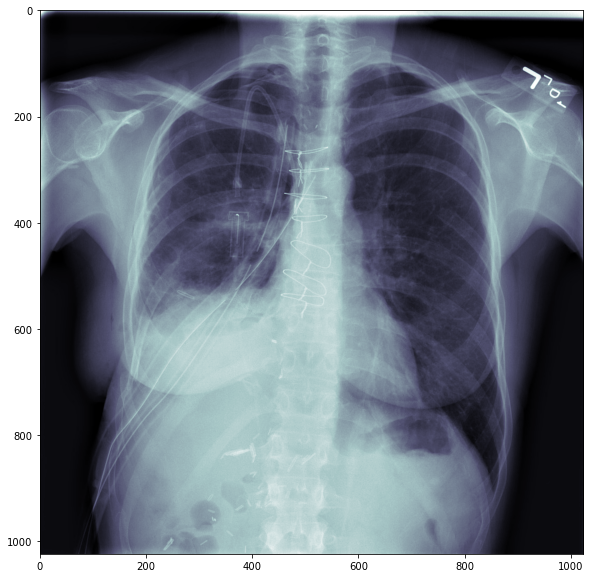


Filename.........:  ../dicom/train_images/1.2.276.0.7230010.3.1.4.8323329.303.1517875162.295039.dcm
Storage type.....:  1.2.840.10008.5.1.4.1.1.7

Patient name.....:  019a6d6a-4eac-4372-a1d4-fe9193826333, 
Patient ID.......:  019a6d6a-4eac-4372-a1d4-fe9193826333
Patient Age......:  44
Patient Sex......:  M
Modality.........:  CR
Body Part........:  CHEST
View Position....:  PA
Image size.......:  1024 x 1024, 130602 bytes
Pixel spacing....:  [0.171, 0.171]


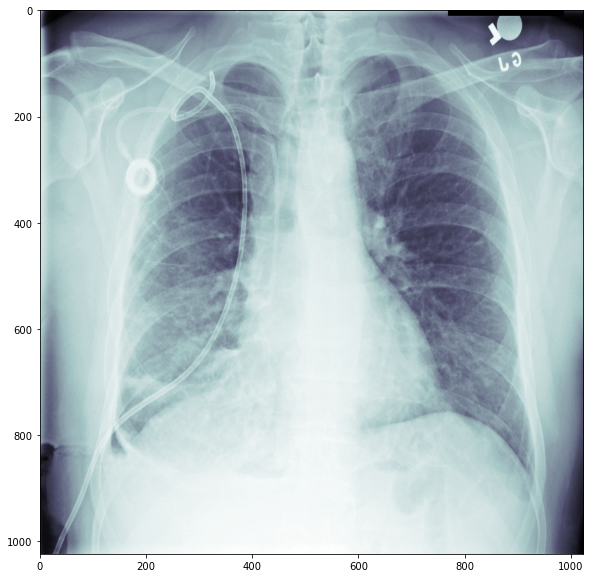


Filename.........:  ../dicom/train_images/1.2.276.0.7230010.3.1.4.8323329.302.1517875162.286330.dcm
Storage type.....:  1.2.840.10008.5.1.4.1.1.7

Patient name.....:  e6f57005-8262-46ac-92ab-7c858e4ae126, 
Patient ID.......:  e6f57005-8262-46ac-92ab-7c858e4ae126
Patient Age......:  74
Patient Sex......:  M
Modality.........:  CR
Body Part........:  CHEST
View Position....:  PA
Image size.......:  1024 x 1024, 136118 bytes
Pixel spacing....:  [0.171, 0.171]


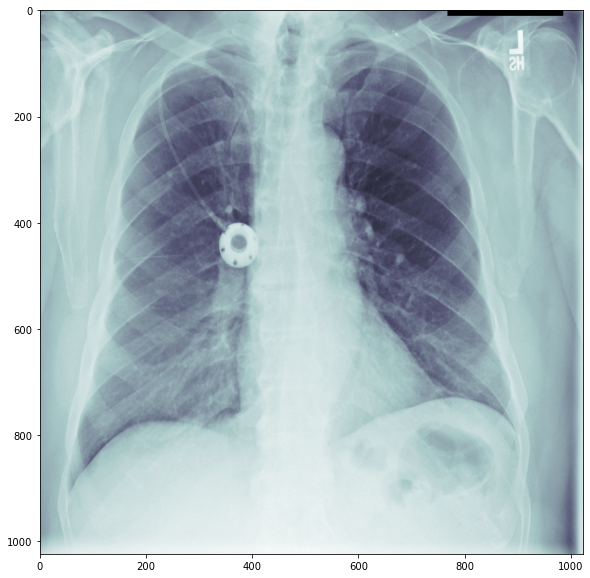

In [5]:
i = 1
num_to_plot = 5
path = '../dicom/train_images/'
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    ds = pydicom.dcmread(file_path)
    show_dcm_info(ds)
    plot_pixel_array(ds)
    
    if i >= num_to_plot:
        break
        
    i += 1

Data in DICOM header

In [6]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.302.1517875162.286330
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.302.1517875162.286330
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time          

Info about undelying pixel data

In [7]:
im = ds.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


Convert DICOM to JPG/PNG

In [8]:
import cv2

In [9]:
def dicom_to_jpg():
    # Change to True to make PNG format
    PNG = False
    # DICOM folder path
    folder_path = '../dicom/train_images/'
    # Output path
    output_path = '../dicom/converted/'
    images_path = os.listdir(folder_path)
    for n, image in enumerate(images_path):
        ds = pydicom.dcmread(os.path.join(folder_path, image))
        pixel_array_numpy = ds.pixel_array
        if PNG == False:
            image = image.replace('.dcm', '.jpg')
        else:
            image = image.replace('.dcm', '.png')
        cv2.imwrite(os.path.join(output_path, image), pixel_array_numpy)
        if n % 50 == 0:
            print('{} image converted'.format(n))

In [10]:
dicom_to_jpg()

0 image converted


**Patient Demographics**

In [11]:
# Load functions from scikit-image library

from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank

# For date functions
from datetime import datetime

In [12]:
ds.dir('patient')

['PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex']

In [13]:
ds.PatientName

'e6f57005-8262-46ac-92ab-7c858e4ae126'

In [14]:
# Change Patient Name

AKA = "Blaine, Richard"
ds.PatientName = AKA
ds.PatientName

'Blaine, Richard'

In [15]:
# Change DOB

epoch = '19700101'
ds.PatientBirthDate = epoch

ds.PatientBirthDate

'19700101'

In [16]:
! python --version

Python 3.9.7


In [17]:
# Calculate patient age at time of scan
dob = datetime.strptime(ds.PatientBirthDate, '%Y%m%d')
study_date = datetime.strptime(ds.StudyDate, '%Y%m%d')
age = (study_date - dob).days/365

print ("Age = ", age)

Age =  -69.04657534246576


In [18]:
# Calculate current age
dob = datetime.strptime(ds.PatientBirthDate, '%Y%m%d')
now = datetime.now()
current_age = (now - dob).days/365

print("Current age = ", current_age)

Current age =  53.25205479452055


In [19]:
# Change study date

fictional = '20210504'
ds.StudyDate = fictional

ds.StudyDate

'20210504'

**Anonymizing a folder of DICOM images**

In [20]:
for filename in glob.iglob('cleft/*.DCM', recursive=True):
    ds = pydicom.read_file(filename, force=True)
    
    # Obtain the name of the folder containing the DICOM files
    foldername=os.path.basename(os.path.dirname(os.path.dirname(filename)))
    
    # Delete patient name, patientID, accession number and patient birthdate
    del ds.PatientName
    del ds.PatientID
    del ds.AccessionNumber
    del ds.PatientBirthDate
    
    pydicom.write_file(filename,ds)
    print(filename)

**iPython Widgets**

In [21]:
from ipywidgets import interactive, interact, widgets, Layout, Button, Box, Dropdown, IntSlider
from IPython.display import display

In [22]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
def contrast_adjust(image_name, percentile_lo, percentile_hi):
    
    # save optimized image array to global vaiable so that other functions can use
    global img_rescale_interactive, image_name_global
    
    image_name_global = image_name
    p_lo, p_hi = np.percentile(eval(image_name), (percentile_lo, percentile_hi))
    
    img_rescale = exposure.rescale_intensity(eval(image_name), in_range=(p_lo, p_hi))
    
    
    img_rescale_interactive = img_rescale
    
    plt.figure(figsize = (6,6), dpi=100)
    plt.imshow(img_rescale, cmap=plt.cm.gray)
    
    plt.show()

In [24]:
# Widget to save image in differnt formats

button_jpg = widgets.Button(description = "Save .jpg version")
button_png = widgets.Button(description = "Save .png version")
button_tiff = widgets.Button(description = "Save .tiff version")

items = [
    button_jpg,
    button_png,
    button_tiff
]

box_layout = Layout(display = 'flex',
                   flex_flow = 'row',
                   align_items = 'stretch'
                   )

box = Box(children = items, layout = box_layout)

def jpg_button_clicked(b):
    plt.imsave(image_name_global + '.jpg', img_rescale_interactive, cmap=plt.cm.gray)
    
def png_button_clicked(b):
    plt.imsave(image_name_global + '.png', img_rescale_interactive, cmap=plt.cm.gray)
    
def tiff_button_clicked(b):
    plt.imsave(image_name_global + '.tiff', img_rescale_interactive, cmap=plt.cm.gray)
    
button_jpg.on_click(jpg_button_clicked)
button_png.on_click(png_button_clicked)
button_tiff.on_click(tiff_button_clicked)

In [28]:
w = interactive(contrast_adjust, image_name='ds.pixel_array', percentile_lo=(1,100,.5), percentile_hi=(1,100,.5))

display(w)

box

interactive(children=(Text(value='ds.pixel_array', description='image_name'), FloatSlider(value=50.0, descript…

Box(children=(Button(description='Save .jpg version', style=ButtonStyle()), Button(description='Save .png vers…

In [29]:
image_name_global

'ds.pixel_array'

Invert Image

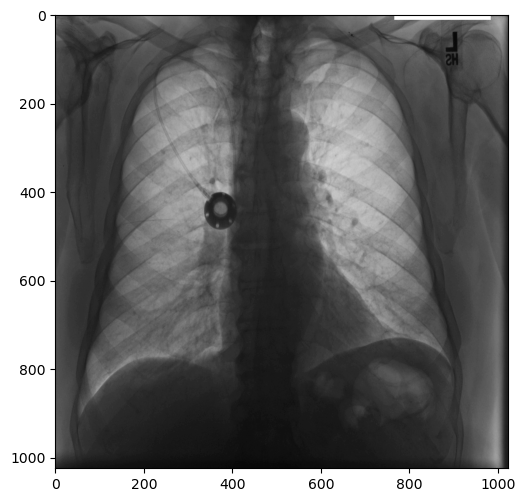

In [30]:
plt.figure(figsize = (6, 6), dpi=100)
figure = plt.imshow(ds.pixel_array, cmap=plt.cm.gist_yarg)

Mirror Image R > L

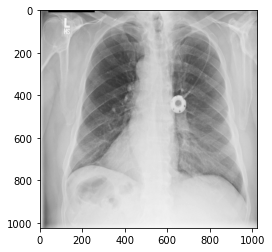

In [31]:
plt.imshow(np.fliplr(ds.pixel_array), cmap=plt.cm.gray)

Flip Image 

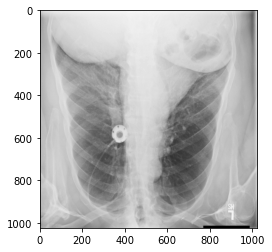

In [32]:
plt.imshow(np.flipud(ds.pixel_array), cmap=plt.cm.gray)

**Histogram**

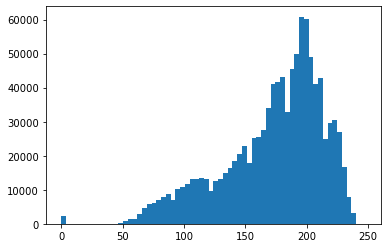

pixel array =  (1024, 1024)
minimum value =  0
maximum value =  248


In [33]:
plt.hist(ds.pixel_array.flatten(), bins=64)
plt.show()

print("pixel array = ", ds.pixel_array.shape)
print("minimum value = ", np.amin(ds.pixel_array)) # Find minimum value in pixel array
print("maximum value = ", np.amax(ds.pixel_array)) # Find maximum value in pixel array

# View Multiplanar Datasets

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import interact, Dropdown, IntSlider
%matplotlib notebook
plt.style.use('grayscale')

train_abnl = pd.read_csv('../MRNet/MRNet-v1.0/train-abnormal.csv', header=None,
                        names=['Case', 'Abnormal'],
                        dtype={'Case': str, 'Abnormal': np.int64})
train_path='../MRNet/MRNet-v1.0/train'

# Data loading functions
def load_one_stack(case, data_path=train_path, plane='coronal'):
    fpath = data_path/plane/'{}.npy'.format(case)
    return np.load(fpath)

def load_stacks(case, data_path=train_path):
    x = {}
    planes = ['coronal', 'sagital', 'axial']
    for i, plane in enumerate(planes):
        x[plane] = load_one_stack(case, plane=plane)
    return x

# Interactive viewer
class KneePlot():
    def __init__(self, x, figsize=(10, 10)):
        self.x = x
        self.planes = list(x.keys())
        self.slice_nums = {plane: self.x[plane].shape[0] for plane in self.planes}
        self.figsize = figsize
        
    def _plot_slices(self, plane, im_slice):
        fig, ax = plt.subplots(1, 1, figsize=self.figsize)
        ax.imshow(self.x[plane][im_slice, :, :])
        plt.show()
        
    def draw(self):
        planes_widget = Dropdown(options=self.planes)
        plane_init = self.planes[0]
        slice_init = self.slice_nums[plane_init] - 1
        slices_widget = IntSlider(min=0, max=slice_init, value=slice_init//2)
        def update_slices_widget(*args):
            slices_widget.max = self.slice_nums[planes_widget.value] - 1
            slices_widget.value = slices_widget.max // 2
        planes_widget.observe(update_slices_widget, 'value')
        interact(self._plot_slices, plane=planes_widget, im_slice=slices_widget)
        
    def resize(self, figsize):
        self.figsize = figsize
        
#example use
case = train_abnl.Case[0]
x = load_stacks(case)
plot = KneePlot(x, figsize=(8, 8))
plot.draw()

FileNotFoundError: [Errno 2] No such file or directory: '../MRNet/MRNet-v1.0/train-abnormal.csv'